In [2]:
#importing required libraries

import pandas as pd
# importing pandas library for importing and numerical operations

import numpy as np
# numpy library for data manipulation and analysis

import matplotlib.pyplot as plt
# importing matplotlib.pyplot library for creating data visualizations such as plots and charts.

from sklearn.decomposition import PCA
# Importing PCA algorithm 

from sklearn.manifold import TSNE
# Importing t-SNE (t-Distributed Stochastic Neighbor Embedding) from sklearn.manifold

import seaborn as sns
# importing seaborn library whch is used for creating statistical graphics such as plots.

In [3]:
data = pd.read_csv(r'C:\Users\Student\Desktop\lncRNA_5_Cancers.csv')
# Loading the lncRNA_5_Cancers expression data to the data variable using pandas.

In [4]:
val = pd.DataFrame(data.iloc[:, 1:12310]) 
# Created a Dataframe 'val' with specific features from the original DataFrame 'data' of data dimension of 12309

In [5]:
pca = PCA(n_components=2).fit_transform(val)
# Initializing PCA with 2 components
# Applying PCA fit transformation to the 'val' DataFrame

In [6]:
tran = pd.DataFrame(data=pca, columns=['PC1', 'PC2'])
# Creating a new DataFrame 'tran' using pandas with the PCA transformation results, naming the columns 'PC1' and 'PC2' 

In [7]:
cols=pd.concat([tran,data[['Class']]],axis=1)
# Concatenating 'tran' and the 'Class' column from the original DataFrame 'data'

In [8]:
cols
# Displays the Data in Cols Dataframe

,PC1,PC2,Class
0,-17.864791,15.904503,KIRC
1,-8.682791,9.634450,KIRC
2,-20.860309,16.121578,KIRC
3,-25.767978,19.649743,KIRC
4,-21.025951,13.430290,KIRC
...,...,...,...
2524,-2.416017,-3.437234,THCA
2525,3.469989,4.820638,THCA
2526,5.365098,9.652960,THCA
2527,6.445645,10.172874,THCA


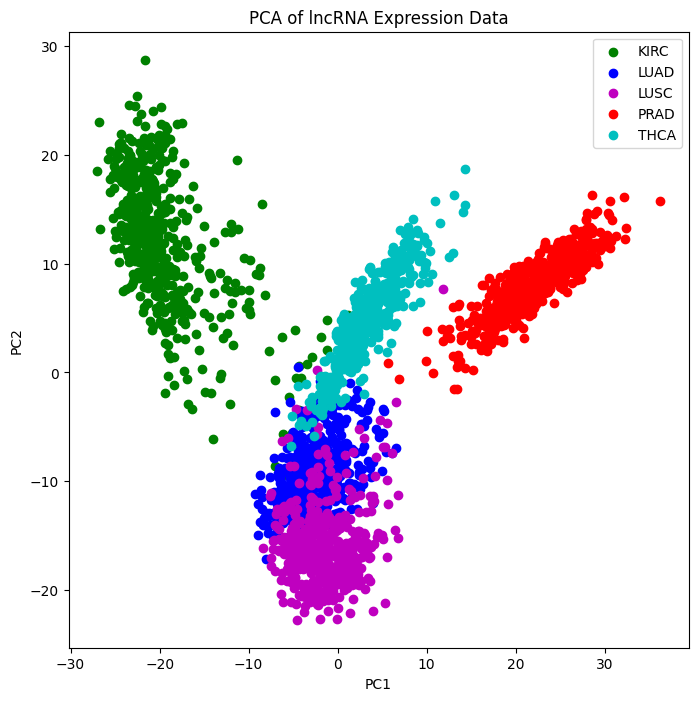

In [11]:
plt.figure(figsize=(8, 8)) # Creating a new figure for the plot
cancer_types = ['KIRC','LUAD','LUSC','PRAD','THCA'] # craeted a list of cancer_types
colors = ['g', 'b', 'm', 'r', 'c']  # Assign colors for each cancer type
for i in range(len(cancer_types)): # Looping through the cancer types and colors to create scatter plots
    cancer_type = cancer_types[i] # defining the cancer_type while looping
    color = colors[i]  # defining the color for each cancer_type
    subset = cols['Class'] == cancer_type     # Creating a subset of the data for the current cancer type
    plt.scatter(cols.loc[subset, 'PC1'], cols.loc[subset, 'PC2'], c = color) 
    # Creating a scatter plot for the PC1 and PC2 columns with a specific color

# Adding title and labels to the plot
plt.title('PCA of lncRNA Expression Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
# Adding a legend to the plot using the cancer types as labels
plt.legend(cancer_types)
plt.show() # Displaying the plots

Text(0.5, 1.0, 'Violin Plot for PC1')

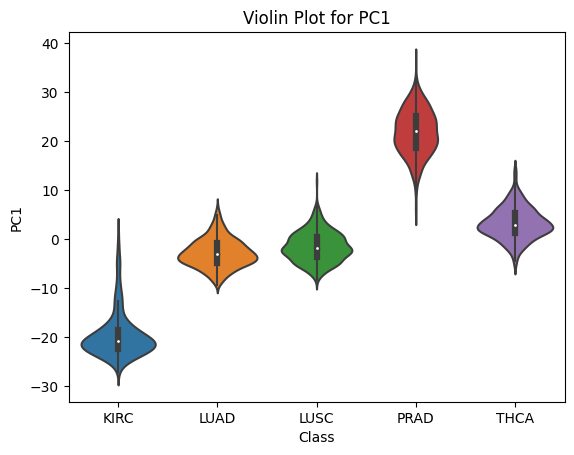

In [12]:
sns.violinplot(x=cols['Class'], y=cols['PC1'])
# Violin plot for Dirstribution of PC1 values across Class values.
plt.title('Violin Plot for PC1')

Text(0.5, 1.0, 'Violin Plot for PC2')

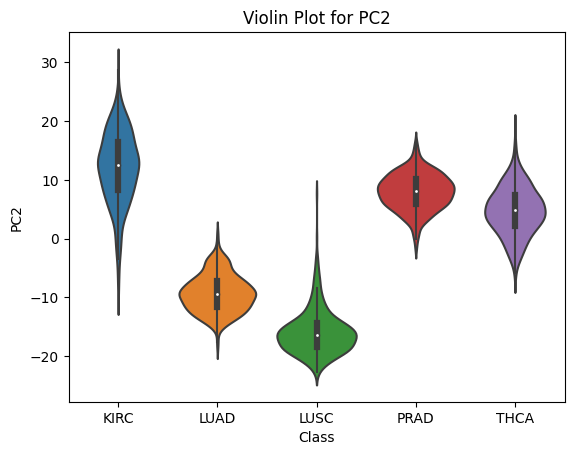

In [13]:
sns.violinplot(x=cols['Class'], y=cols['PC2'])
# Violin plot for Dirstribution of PC2 values across Class values.
plt.title('Violin Plot for PC2')

In [14]:
# Task 3 - TSNE Approach

In [16]:
tsne = TSNE(n_components=2,learning_rate='auto', init='random', perplexity=30).fit_transform(val)
# Initializing TSNE with hyperparameters with 2 components and low dimenisonal points randomly
# perplexity is related to the number of nearest neighbors, we can consider selecting a value between 5 and 50.
# Applying tsne fit transformation to the 'tval' DataFrame

In [17]:
tdf = pd.DataFrame(data=tsne,columns=['TSNE1','TSNE2'])
# Creating a new DataFrame 'tdf' using pandas with the tsne transformation results, naming the columns 'TSNE1' and 'TSNE2' 

In [18]:
tcols=pd.concat([tdf,data[['Class']]],axis=1)
# Concatenating 'tdf' and the 'Class' column from the original DataFrame 'data'

In [19]:
tcols
# Displays the data of t-SNE dataframe tcols

,TSNE1,TSNE2,Class
0,4.790019,-41.407803,KIRC
1,-6.156798,-35.291615,KIRC
2,1.908138,-44.840794,KIRC
3,7.275459,-44.764561,KIRC
4,8.879827,-35.962132,KIRC
...,...,...,...
2524,-8.264047,-6.864401,THCA
2525,-16.331833,-11.841193,THCA
2526,-19.853025,-9.079947,THCA
2527,-29.489889,-13.338554,THCA


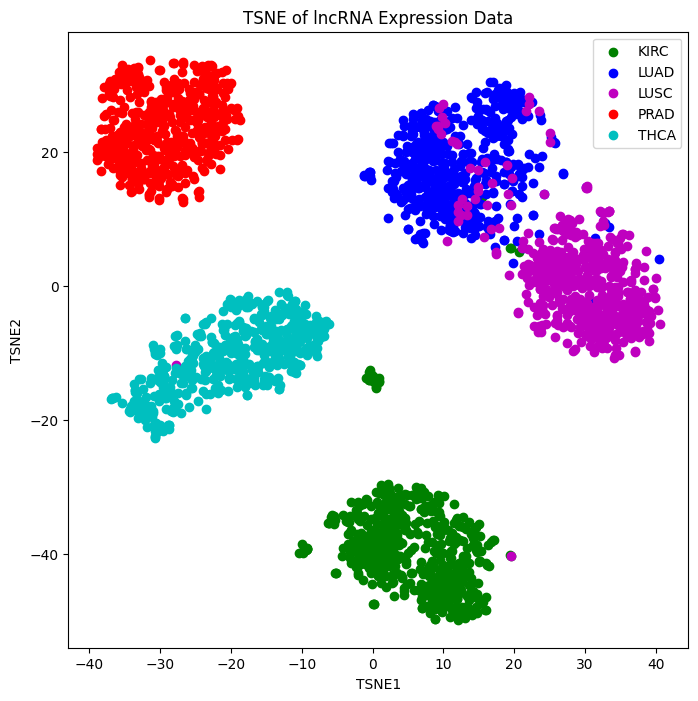

In [20]:
plt.figure(figsize=(8, 8)) # Creating a new figure for the plot
cancer_types = ['KIRC','LUAD','LUSC','PRAD','THCA']
colors = ['g', 'b', 'm', 'r', 'c'] # Assign colors for each cancer type
for i in range(len(cancer_types)): # Looping through the cancer types and colors to create scatter plots
    cancer_type = cancer_types[i] # defining the cancer_type while looping
    color = colors[i]  # defining the color for each cancer_type
    tsubset = tcols['Class'] == cancer_type # Creating a subset of the data for the current cancer type
    plt.scatter(tcols.loc[tsubset, 'TSNE1'], tcols.loc[tsubset, 'TSNE2'], c = color) 
    # Creating a scatter plot for the TSNE1 and TSNE2 columns with a specific color

# Adding title and labels to the plot
plt.title('TSNE of lncRNA Expression Data')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(cancer_types)
plt.show() # Displaying the Distribution of TSNE

Text(0.5, 1.0, 'Violin Plot for TSNE1')

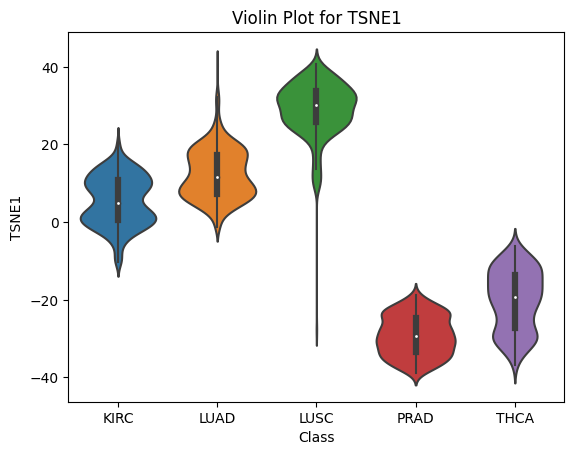

In [21]:
sns.violinplot(x=tcols['Class'], y=tcols['TSNE1'])
# Violin plot for Dirstribution of TSNE1 values across Class values.
plt.title('Violin Plot for TSNE1')

Text(0.5, 1.0, 'Violin Plot for TSNE2')

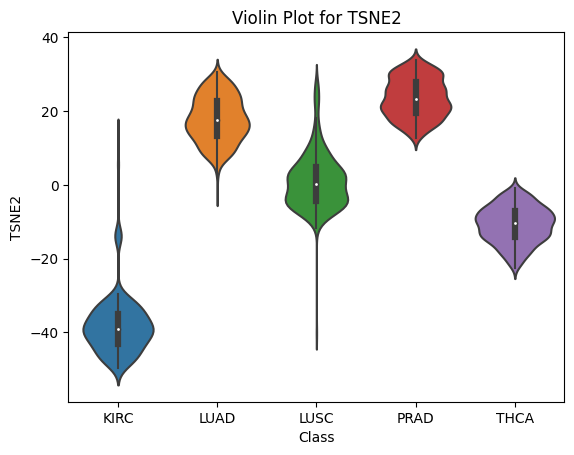

In [22]:
sns.violinplot(x=tcols['Class'], y=tcols['TSNE2'])
# Violin plot for Dirstribution of TSNE2 values across Class values.
plt.title('Violin Plot for TSNE2')